# 1.Create a user-defined function to compute pairwise Pearson correlation coefficients.

In [3]:
import pandas as pd
import numpy as np

def corr_coeff(df, col1, col2):
    return df[[col1, col2]].corr().iloc[0, 1]

# load the data into a pandas dataframe
df = pd.read_csv("iris.csv")

In [4]:
print(corr_coeff(df, "sepal_length", "sepal_width"))

-0.11756978413300088


In [5]:
print(corr_coeff(df, "sepal_length", "petal_length"))

0.8717537758865838


In [6]:
print(corr_coeff(df, "sepal_length", "petal_width"))

0.8179411262715758


In [7]:
print(corr_coeff(df, "sepal_width", "petal_length"))

-0.42844010433053864


In [8]:
print(corr_coeff(df, "sepal_width", "petal_width"))

-0.3661259325364377


In [9]:
print(corr_coeff(df, "petal_length", "petal_width"))

0.962865431402796


In [10]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


# 2.plot the graphs to visualize the correlation between two variables and also write a code to visualize the correlation matrix.

In [11]:
import matplotlib.pyplot as plt

def scatter_plot(X,Y,xlabel,ylabel):

    plt.scatter(X,Y)

    plt.title('Plot between '+f'{xlabel} ' + ' and ' + f'{ylabel}')

    plt.xlabel(xlabel)

    plt.ylabel(ylabel)

    plt.show()

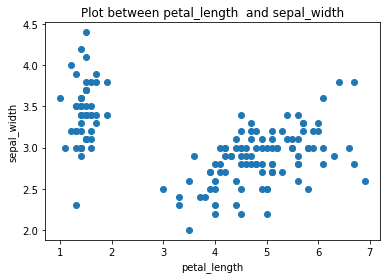

In [12]:
scatter_plot(df['petal_length'],df['sepal_width'],'petal_length','sepal_width')

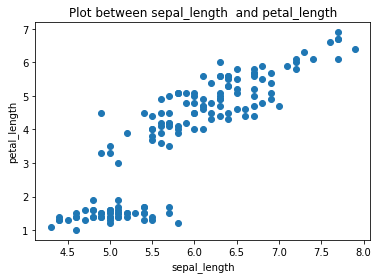

In [13]:
scatter_plot(df['sepal_length'],df['petal_length'],'sepal_length','petal_length')

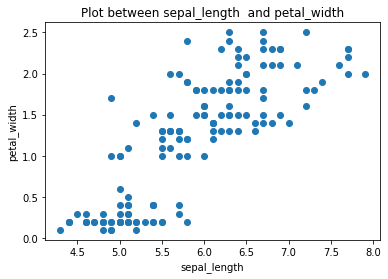

In [14]:
scatter_plot(df['sepal_length'],df['petal_width'],'sepal_length','petal_width')

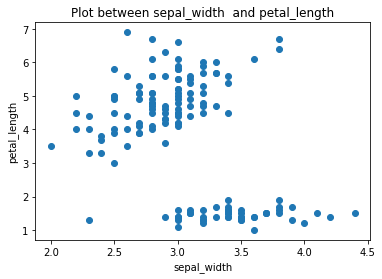

In [15]:
scatter_plot(df['sepal_width'],df['petal_length'],'sepal_width','petal_length')

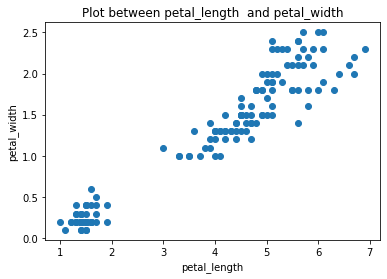

In [16]:
scatter_plot(df['petal_length'],df['petal_width'],'petal_length','petal_width')

In [17]:
# code to visualize the correlation matrix.
df.corr().style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [18]:
# code to visualize the correlation matrix using heatmap.
import seaborn as sns

def visualize_correlation_matrix(df):
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

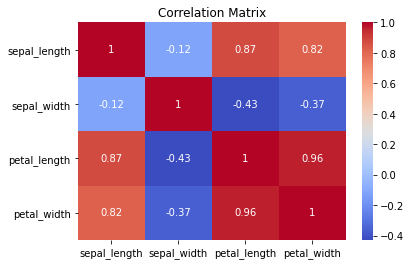

In [19]:
visualize_correlation_matrix(df)

# 3.Perform z-score standardization on the data.

In [28]:
from sklearn.preprocessing import StandardScaler

def standardize_data(dataframe, columns):
    standardized_df = pd.DataFrame(StandardScaler().fit_transform(dataframe[columns]))
    return standardized_df

z_score_standardization = standardize_data(df, ['sepal_length','sepal_width','petal_length','petal_width'])
z_score_standardization

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


# 4. Compute covariance matrix for the standardized data.

In [30]:
cov = z_score_standardization.cov()
cov

,0,1,2,3
0,1.006711,-0.118359,0.877604,0.823431
1,-0.118359,1.006711,-0.431316,-0.368583
2,0.877604,-0.431316,1.006711,0.969328
3,0.823431,-0.368583,0.969328,1.006711


# 5. Find the eigenvalues and eigenvectors for the covariance matrix and print them in descending order. 

In [31]:
eig_vals, eig_vecs = np.linalg.eig(cov)

In [32]:
eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [33]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])